In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import seaborn as sns
import os
import shutil
import random
import matplotlib.pyplot as plt

Removing unwanted folder: /content/drive/MyDrive/dataset/processed_data/.ipynb_checkpoints
Found 1237 images belonging to 3 classes.
Found 307 images belonging to 3 classes.


/tmp/ipython-input-4269074978.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_counts.index, y=train_counts.values, palette="Blues_d")
/tmp/ipython-input-4269074978.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=test_counts.index, y=test_counts.values, palette="Greens_d")


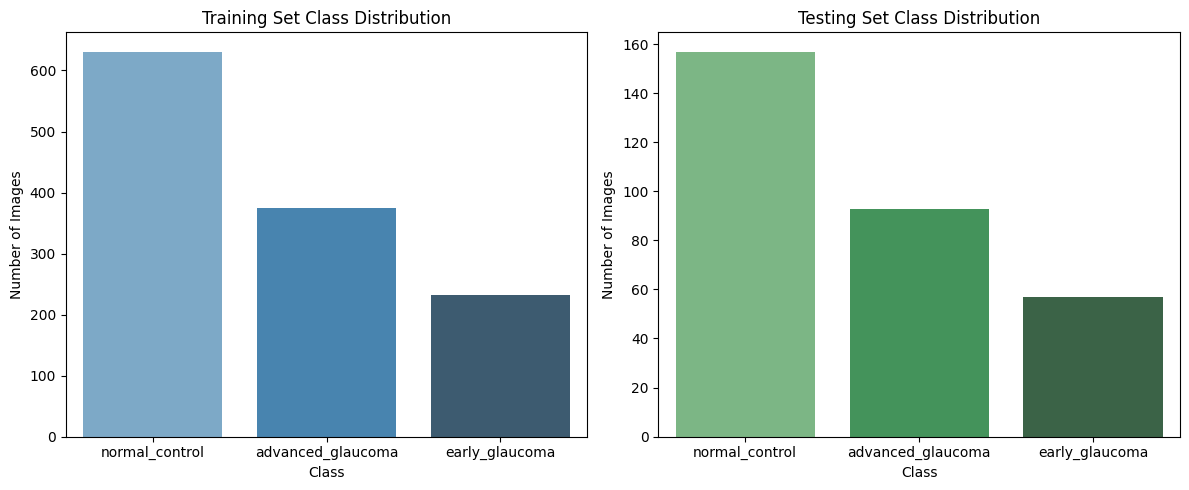


✅ Dataset successfully prepared!
Training samples: 1237
Testing samples: 307
Classes found: ['advanced_glaucoma', 'early_glaucoma', 'normal_control']


In [ ]:
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ===============================
# 1. Remove unwanted folders
# ===============================
dataset_path = "/content/drive/MyDrive/dataset/processed_data"  # change to your dataset directory

for root, dirs, files in os.walk(dataset_path):
    for d in dirs:
        if d == ".ipynb_checkpoints":
            dir_path = os.path.join(root, d)
            print(f"Removing unwanted folder: {dir_path}")
            shutil.rmtree(dir_path, ignore_errors=True)

# ===============================
# 2. Prepare Data Generators
# ===============================
img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% train, 20% test
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

test_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# ===============================
# 3. Compute Class Distribution
# ===============================
import numpy as np
import pandas as pd

# Function to count classes from generator
def get_class_distribution(generator):
    labels = generator.classes
    class_indices = {v: k for k, v in generator.class_indices.items()}
    label_names = [class_indices[i] for i in labels]
    df = pd.DataFrame(label_names, columns=["Class"])
    return df["Class"].value_counts()

train_counts = get_class_distribution(train_generator)
test_counts = get_class_distribution(test_generator)

# ===============================
# 4. Visualize Class Distribution
# ===============================
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(x=train_counts.index, y=train_counts.values, palette="Blues_d")
plt.title("Training Set Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")

plt.subplot(1,2,2)
sns.barplot(x=test_counts.index, y=test_counts.values, palette="Greens_d")
plt.title("Testing Set Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")

plt.tight_layout()
plt.show()

# ===============================
# 5. Summary Output
# ===============================
print("\n✅ Dataset successfully prepared!")
print(f"Training samples: {train_generator.samples}")
print(f"Testing samples: {test_generator.samples}")
print(f"Classes found: {list(train_generator.class_indices.keys())}")


In [ ]:
class_labels = os.listdir(dataset_path)
image_counts = []
for label in class_labels:
    class_path = os.path.join(dataset_path, label)
    image_count = len(os.listdir(class_path))
    image_counts.append(image_count)

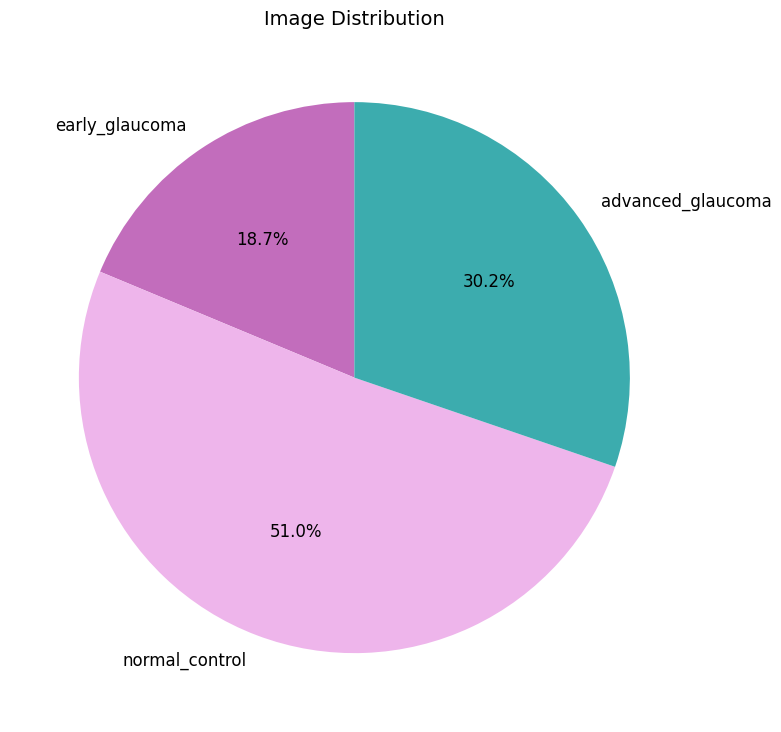

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(
    image_counts,
    labels=class_labels,
    autopct='%1.1f%%',
    colors=['#c26dbc', '#eeb5eb', '#3cacae'],  # your custom colors
    startangle=90,
    textprops={'fontsize': 12}
)
plt.title('Image Distribution', fontsize=14)
plt.tight_layout()
plt.show()


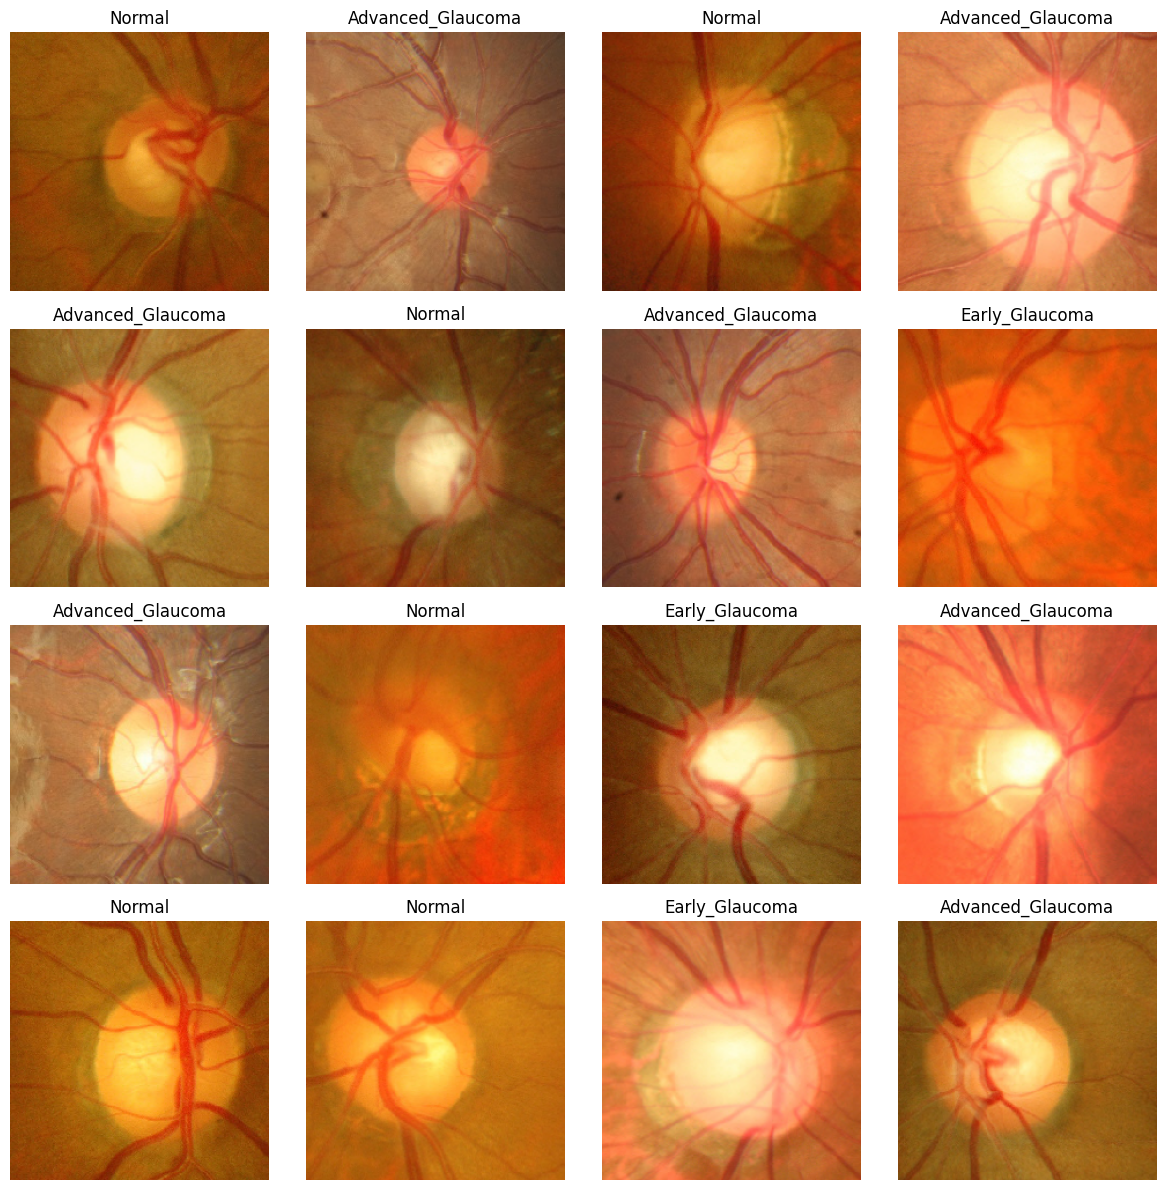

In [ ]:
t_img, label = next(train_generator)

def plotImages(img_arr, label):
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    axes = axes.ravel()

    for i in range(16):
        img = img_arr[i]
        axes[i].imshow(img)
        label_dict = {
            2: 'Advanced_Glaucoma',
            1: 'Early_Glaucoma',
            0: 'Normal'
        }
        axes[i].set_title(label_dict[np.where(label[i] == 1)[0][0]])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

plotImages(t_img, label)

In [6]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img

dataset_path = "C:\\Users\\zaina\\Downloads\\processed_data - Copy"  # change this to your dataset folder

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

classes = ["advanced_glaucoma", "early_glaucoma", "normal_control"]

for class_name in classes:
    class_folder = os.path.join(dataset_path, class_name)
    for file in os.listdir(class_folder):
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(class_folder, file)
            img = load_img(img_path) 
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape) 
            i = 0
            for batch in datagen.flow(x, batch_size=1, save_to_dir=class_folder,
                   
                save_prefix='aug', save_format='jpg'):
                i += 1
                if i >= 50:
                    break

print("Data augmentation complete. Augmented images saved in original class folders.")

Data augmentation complete. Augmented images saved in original class folders.


Found 22410 images belonging to 3 classes.
Found 5601 images belonging to 3 classes.


C:\Users\zaina\AppData\Local\Temp\ipykernel_37676\2482085737.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_counts.index, y=train_counts.values, palette="Blues_d")
C:\Users\zaina\AppData\Local\Temp\ipykernel_37676\2482085737.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=test_counts.index, y=test_counts.values, palette="Greens_d")


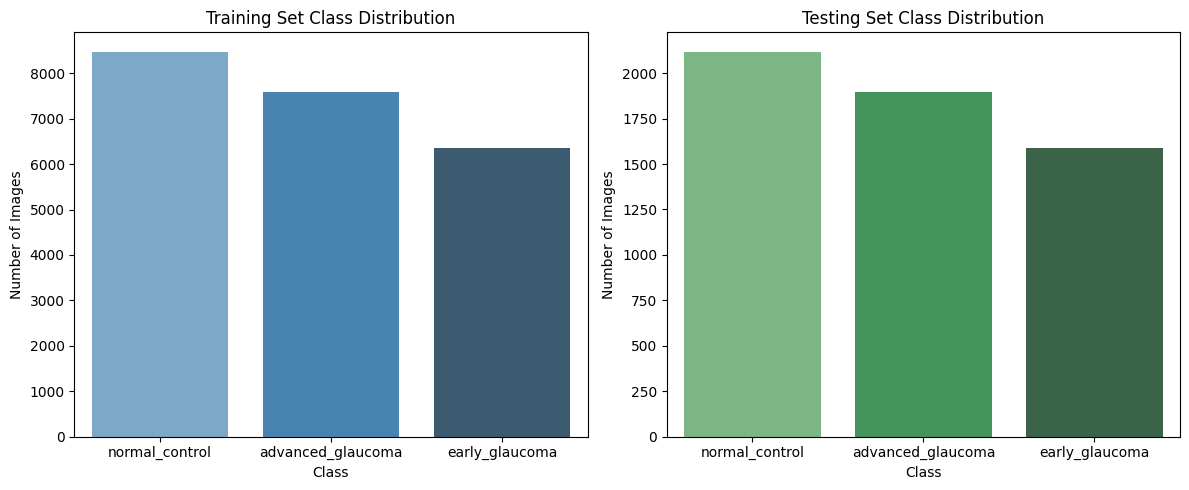


✅ Dataset successfully prepared!
Training samples: 22410
Testing samples: 5601
Classes found: ['advanced_glaucoma', 'early_glaucoma', 'normal_control']


In [3]:
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ===============================
# 1. Remove unwanted folders
# ===============================
dataset_path2 = "C:\\Users\\zaina\\Downloads\\processed_data - Copy"  # change to your dataset directory

for root, dirs, files in os.walk(dataset_path2):
    for d in dirs:
        if d == ".ipynb_checkpoints":
            dir_path = os.path.join(root, d)
            print(f"Removing unwanted folder: {dir_path}")
            shutil.rmtree(dir_path, ignore_errors=True)

# ===============================
# 2. Prepare Data Generators
# ===============================
img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% train, 20% test
)

train_generator = datagen.flow_from_directory(
    dataset_path2,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

test_generator = datagen.flow_from_directory(
    dataset_path2,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# ===============================
# 3. Compute Class Distribution
# ===============================
import numpy as np
import pandas as pd

# Function to count classes from generator
def get_class_distribution(generator):
    labels = generator.classes
    class_indices = {v: k for k, v in generator.class_indices.items()}
    label_names = [class_indices[i] for i in labels]
    df = pd.DataFrame(label_names, columns=["Class"])
    return df["Class"].value_counts()

train_counts = get_class_distribution(train_generator)
test_counts = get_class_distribution(test_generator)

# ===============================
# 4. Visualize Class Distribution
# ===============================
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(x=train_counts.index, y=train_counts.values, palette="Blues_d")
plt.title("Training Set Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")

plt.subplot(1,2,2)
sns.barplot(x=test_counts.index, y=test_counts.values, palette="Greens_d")
plt.title("Testing Set Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")

plt.tight_layout()
plt.show()

# ===============================
# 5. Summary Output
# ===============================
print("\n✅ Dataset successfully prepared!")
print(f"Training samples: {train_generator.samples}")
print(f"Testing samples: {test_generator.samples}")
print(f"Classes found: {list(train_generator.class_indices.keys())}")


In [4]:
class_labels = os.listdir(dataset_path2)
image_counts = []
for label in class_labels:
    class_path = os.path.join(dataset_path2, label)
    image_count = len(os.listdir(class_path))
    image_counts.append(image_count)

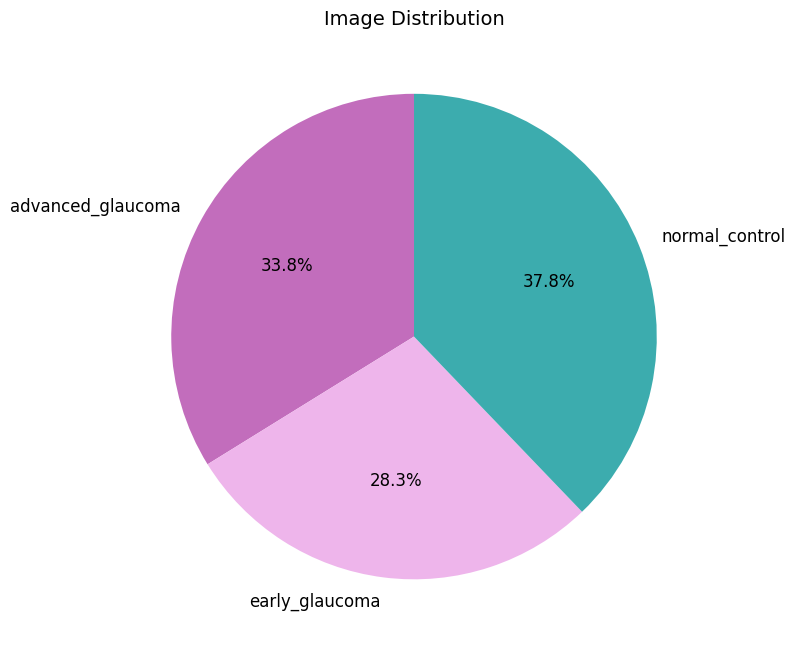

In [7]:
plt.figure(figsize=(8, 8))
plt.pie(
    image_counts,
    labels=class_labels,
    autopct='%1.1f%%',
    colors=['#c26dbc', '#eeb5eb', '#3cacae'],  # your custom colors
    startangle=90,
    textprops={'fontsize': 12}
)
plt.title('Image Distribution', fontsize=14)
plt.tight_layout()
plt.show()

In [7]:
# ======================================
# 📦 Imports
# ======================================
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import random
import os, shutil

# ======================================
# ⚙️ Data Preprocessing & Augmentation
# ======================================
dataset_dir = "C:\\Users\\zaina\\Downloads\\processed_data - Copy"
train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

test_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

class_names = list(train_data.class_indices.keys())
num_classes = len(class_names)

# ======================================
# 🧠 1️⃣ Custom CNN
# ======================================
def build_custom_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# ======================================
# 🧠 4️⃣ MobileNetV2 Transfer Learning
# ======================================
def build_mobilenetv2():
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # freeze base layers for now

    model = models.Sequential([
        base_model,
        layers.BatchNormalization(),
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# ======================================
# ⚙️ Compile & Train Function
# ======================================
def train_model(model, name, epochs=80):
    model.compile(optimizer=Adam(1e-5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    print(f"\n🚀 Training {name}...\n")

    history = model.fit(
        train_data,
        validation_data=test_data,
        epochs=epochs,
        verbose=1
    )

    # Plot Training vs Validation Error
    plt.figure(figsize=(7,5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"{name} Training vs Validation Error")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Evaluate
    test_loss, test_acc = model.evaluate(test_data, verbose=0)
    print(f"{name} Test Accuracy: {test_acc*100:.2f}% | Test Loss: {test_loss:.4f}")

    # Visual prediction
    img_batch, label_batch = next(test_data)
    idx = random.randint(0, len(img_batch)-1)
    img = img_batch[idx]
    true_label = class_names[np.argmax(label_batch[idx])]
    pred = model.predict(np.expand_dims(img, axis=0))
    pred_label = class_names[np.argmax(pred)]

    plt.imshow(img)
    plt.title(f"True: {true_label}\nPredicted: {pred_label}")
    plt.axis('off')
    plt.show()



Found 22410 images belonging to 3 classes.
Found 5601 images belonging to 3 classes.


C:\Users\zaina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\zaina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



🚀 Training Custom CNN...

Epoch 1/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 463s 1s/step - accuracy: 0.6631 - loss: 0.8980 - val_accuracy: 0.5294 - val_loss: 1.0880
Epoch 2/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 453s 1s/step - accuracy: 0.7332 - loss: 0.6702 - val_accuracy: 0.7577 - val_loss: 0.5425
Epoch 3/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 481s 1s/step - accuracy: 0.7720 - loss: 0.5686 - val_accuracy: 0.7954 - val_loss: 0.5109
Epoch 4/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 4764s 14s/step - accuracy: 0.8061 - loss: 0.4734 - val_accuracy: 0.8065 - val_loss: 0.4791
Epoch 5/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 590s 2s/step - accuracy: 0.8303 - loss: 0.4170 - val_accuracy: 0.8132 - val_loss: 0.4669
Epoch 6/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 409s 1s/step - accuracy: 0.8652 - loss: 0.3417 - val_accuracy: 0.8222 - val_loss: 0.4557
Epoch 7/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 405s 1s/step - accuracy: 0.8873 - loss: 0.2877 - val_accuracy: 0.8204 - val_loss: 0.4355
Epoch 8/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 403s 1s/step - accuracy: 0.9

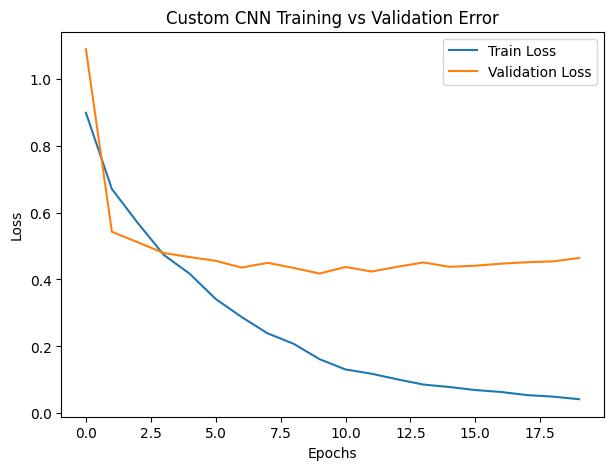

Custom CNN Test Accuracy: 84.23% | Test Loss: 0.4641
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


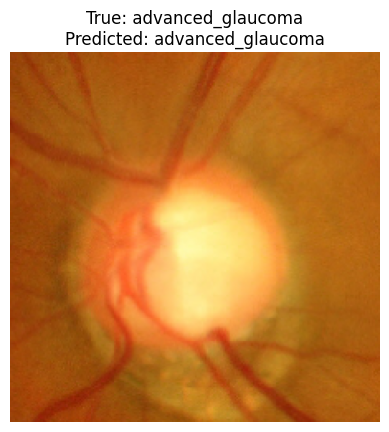

In [15]:
cnn_model = build_custom_cnn()
train_model(cnn_model, "Custom CNN")

C:\Users\zaina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\zaina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



🚀 Training Custom CNN...

Epoch 1/40
351/351 ━━━━━━━━━━━━━━━━━━━━ 437s 1s/step - accuracy: 0.6626 - loss: 0.8901 - val_accuracy: 0.4887 - val_loss: 1.3525
Epoch 2/40
351/351 ━━━━━━━━━━━━━━━━━━━━ 406s 1s/step - accuracy: 0.7353 - loss: 0.6515 - val_accuracy: 0.7725 - val_loss: 0.5196
Epoch 3/40
351/351 ━━━━━━━━━━━━━━━━━━━━ 394s 1s/step - accuracy: 0.7783 - loss: 0.5433 - val_accuracy: 0.8052 - val_loss: 0.4759
Epoch 4/40
351/351 ━━━━━━━━━━━━━━━━━━━━ 412s 1s/step - accuracy: 0.8077 - loss: 0.4681 - val_accuracy: 0.8102 - val_loss: 0.4524
Epoch 5/40
351/351 ━━━━━━━━━━━━━━━━━━━━ 402s 1s/step - accuracy: 0.8378 - loss: 0.4011 - val_accuracy: 0.8250 - val_loss: 0.4322
Epoch 6/40
351/351 ━━━━━━━━━━━━━━━━━━━━ 410s 1s/step - accuracy: 0.8648 - loss: 0.3355 - val_accuracy: 0.8231 - val_loss: 0.4511
Epoch 7/40
351/351 ━━━━━━━━━━━━━━━━━━━━ 401s 1s/step - accuracy: 0.8859 - loss: 0.2897 - val_accuracy: 0.8311 - val_loss: 0.4342
Epoch 8/40
351/351 ━━━━━━━━━━━━━━━━━━━━ 397s 1s/step - accuracy: 0.909

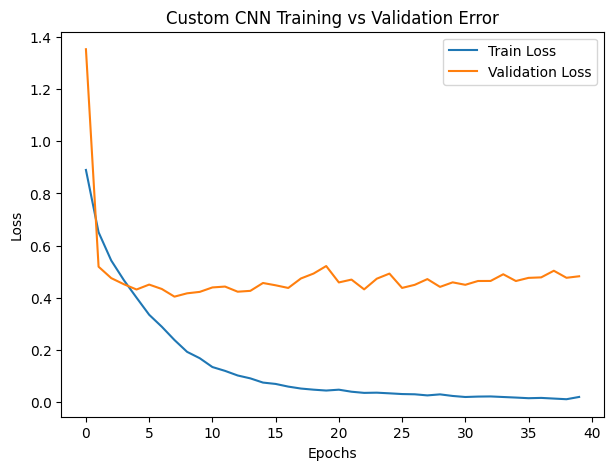

Custom CNN Test Accuracy: 84.29% | Test Loss: 0.4829
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


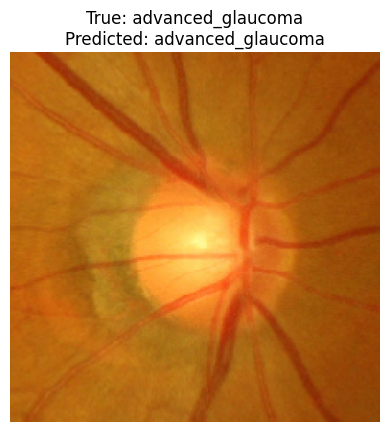

In [6]:
cnn_model = build_custom_cnn()
train_model(cnn_model, "Custom CNN")


🚀 Training Custom CNN...

Epoch 1/80
351/351 ━━━━━━━━━━━━━━━━━━━━ 440s 1s/step - accuracy: 0.6774 - loss: 0.8490 - val_accuracy: 0.5035 - val_loss: 1.0390
Epoch 2/80
351/351 ━━━━━━━━━━━━━━━━━━━━ 405s 1s/step - accuracy: 0.7436 - loss: 0.6362 - val_accuracy: 0.7875 - val_loss: 0.4980
Epoch 3/80
351/351 ━━━━━━━━━━━━━━━━━━━━ 409s 1s/step - accuracy: 0.7846 - loss: 0.5293 - val_accuracy: 0.8165 - val_loss: 0.4518
Epoch 4/80
351/351 ━━━━━━━━━━━━━━━━━━━━ 408s 1s/step - accuracy: 0.8156 - loss: 0.4532 - val_accuracy: 0.8157 - val_loss: 0.4528
Epoch 5/80
351/351 ━━━━━━━━━━━━━━━━━━━━ 473s 1s/step - accuracy: 0.8454 - loss: 0.3850 - val_accuracy: 0.8279 - val_loss: 0.4292
Epoch 6/80
351/351 ━━━━━━━━━━━━━━━━━━━━ 437s 1s/step - accuracy: 0.8706 - loss: 0.3215 - val_accuracy: 0.8266 - val_loss: 0.4240
Epoch 7/80
351/351 ━━━━━━━━━━━━━━━━━━━━ 413s 1s/step - accuracy: 0.8937 - loss: 0.2734 - val_accuracy: 0.8366 - val_loss: 0.4192
Epoch 8/80
351/351 ━━━━━━━━━━━━━━━━━━━━ 418s 1s/step - accuracy: 0.914

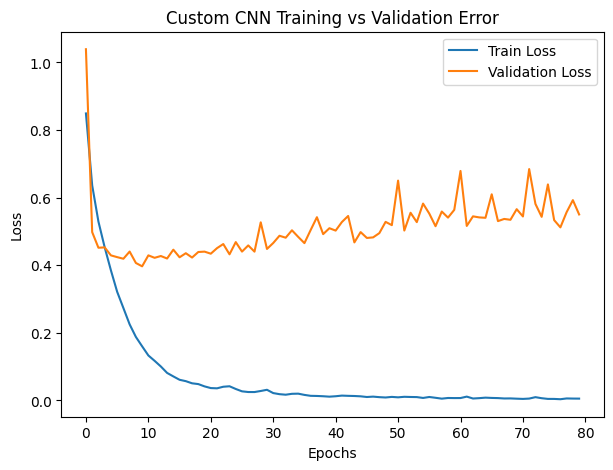

Custom CNN Test Accuracy: 85.22% | Test Loss: 0.5503
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


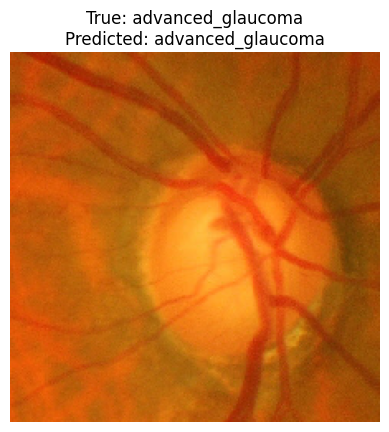

In [8]:
cnn_model = build_custom_cnn()
train_model(cnn_model, "Custom CNN")

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 16s 2us/step

🚀 Training Custome MobileNetV2...

Epoch 1/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 166s 456ms/step - accuracy: 0.4137 - loss: 1.0939 - val_accuracy: 0.4999 - val_loss: 1.0067
Epoch 2/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 158s 450ms/step - accuracy: 0.5033 - loss: 1.0033 - val_accuracy: 0.5579 - val_loss: 0.9426
Epoch 3/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 160s 455ms/step - accuracy: 0.5445 - loss: 0.9488 - val_accuracy: 0.5920 - val_loss: 0.8993
Epoch 4/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 159s 452ms/step - accuracy: 0.5696 - loss: 0.9111 - val_accuracy: 0.6142 - val_loss: 0.8657
Epoch 5/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 2473s 7s/step - accuracy: 0.5967 - loss: 0.8805 - val_accuracy: 0.6349 - val_loss: 0.8378
Epoch 6/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 163s 465ms/step - accuracy: 0.6157 - loss: 0.8523 - val_accuracy: 0.6481 - val_loss: 0.8147
Epoch 7/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 164s 468ms/step - accuracy: 0.6295 - loss: 0.8293 - val_accuracy: 0.6581 - val_loss:

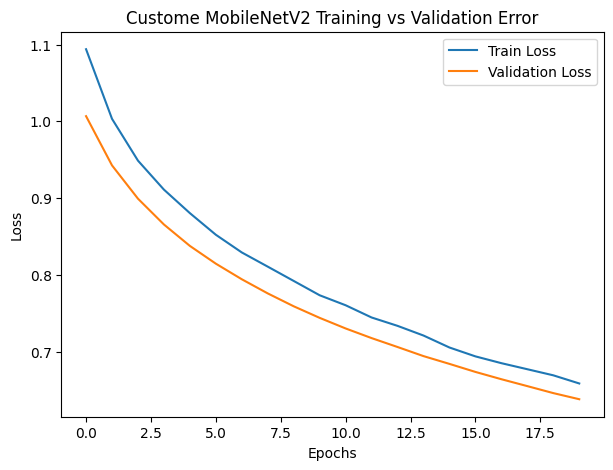

Custome MobileNetV2 Test Accuracy: 73.56% | Test Loss: 0.6382
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


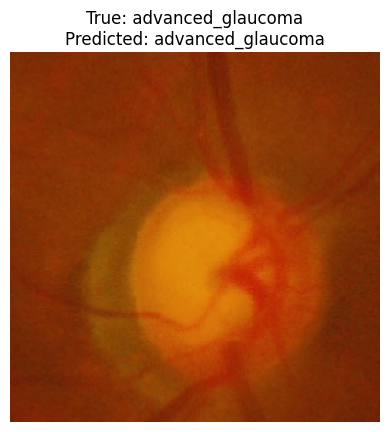

In [11]:
mobilemodel = build_mobilenetv2()
train_model(mobilemodel,"Custome MobileNetV2")


🚀 Training Custome MobileNetV2...



C:\Users\zaina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
351/351 ━━━━━━━━━━━━━━━━━━━━ 189s 526ms/step - accuracy: 0.3926 - loss: 1.1780 - val_accuracy: 0.4444 - val_loss: 1.0657
Epoch 2/40
351/351 ━━━━━━━━━━━━━━━━━━━━ 174s 496ms/step - accuracy: 0.4703 - loss: 1.0399 - val_accuracy: 0.5240 - val_loss: 0.9723
Epoch 3/40
351/351 ━━━━━━━━━━━━━━━━━━━━ 175s 499ms/step - accuracy: 0.5220 - loss: 0.9690 - val_accuracy: 0.5722 - val_loss: 0.9148
Epoch 4/40
351/351 ━━━━━━━━━━━━━━━━━━━━ 174s 497ms/step - accuracy: 0.5653 - loss: 0.9196 - val_accuracy: 0.6011 - val_loss: 0.8758
Epoch 5/40
351/351 ━━━━━━━━━━━━━━━━━━━━ 171s 488ms/step - accuracy: 0.5842 - loss: 0.8884 - val_accuracy: 0.6210 - val_loss: 0.8454
Epoch 6/40
351/351 ━━━━━━━━━━━━━━━━━━━━ 166s 473ms/step - accuracy: 0.6056 - loss: 0.8602 - val_accuracy: 0.6379 - val_loss: 0.8210
Epoch 7/40
351/351 ━━━━━━━━━━━━━━━━━━━━ 166s 474ms/step - accuracy: 0.6200 - loss: 0.8363 - val_accuracy: 0.6493 - val_loss: 0.7999
Epoch 8/40
351/351 ━━━━━━━━━━━━━━━━━━━━ 167s 475ms/step - accuracy: 0.6333 -

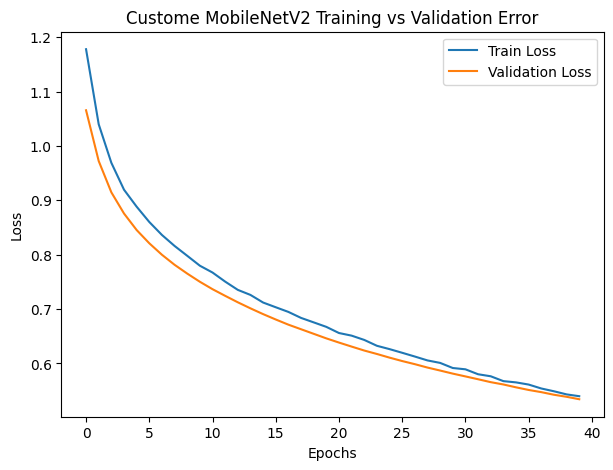

Custome MobileNetV2 Test Accuracy: 78.81% | Test Loss: 0.5342
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 827ms/step


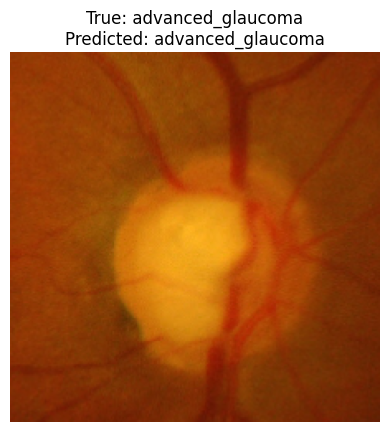

In [13]:
mobilemodel = build_mobilenetv2()
train_model(mobilemodel,"Custome MobileNetV2")


🚀 Training Custome MobileNetV2...

Epoch 1/80


C:\Users\zaina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


351/351 ━━━━━━━━━━━━━━━━━━━━ 168s 467ms/step - accuracy: 0.4399 - loss: 1.0764 - val_accuracy: 0.5265 - val_loss: 0.9805
Epoch 2/80
351/351 ━━━━━━━━━━━━━━━━━━━━ 162s 463ms/step - accuracy: 0.5152 - loss: 0.9906 - val_accuracy: 0.5760 - val_loss: 0.9206
Epoch 3/80
351/351 ━━━━━━━━━━━━━━━━━━━━ 162s 463ms/step - accuracy: 0.5582 - loss: 0.9379 - val_accuracy: 0.6065 - val_loss: 0.8784
Epoch 4/80
351/351 ━━━━━━━━━━━━━━━━━━━━ 388s 1s/step - accuracy: 0.5871 - loss: 0.8976 - val_accuracy: 0.6258 - val_loss: 0.8461
Epoch 5/80
351/351 ━━━━━━━━━━━━━━━━━━━━ 166s 473ms/step - accuracy: 0.6016 - loss: 0.8664 - val_accuracy: 0.6406 - val_loss: 0.8197
Epoch 6/80
351/351 ━━━━━━━━━━━━━━━━━━━━ 166s 473ms/step - accuracy: 0.6219 - loss: 0.8405 - val_accuracy: 0.6577 - val_loss: 0.7970
Epoch 7/80
351/351 ━━━━━━━━━━━━━━━━━━━━ 162s 462ms/step - accuracy: 0.6361 - loss: 0.8163 - val_accuracy: 0.6681 - val_loss: 0.7772
Epoch 8/80
351/351 ━━━━━━━━━━━━━━━━━━━━ 177s 504ms/step - accuracy: 0.6446 - loss: 0.7976 

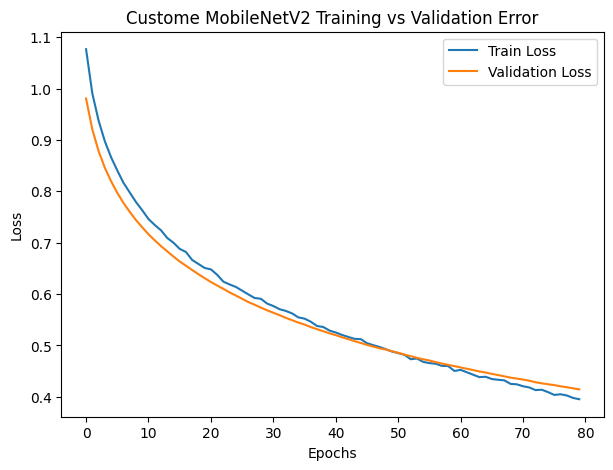

Custome MobileNetV2 Test Accuracy: 83.72% | Test Loss: 0.4145
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


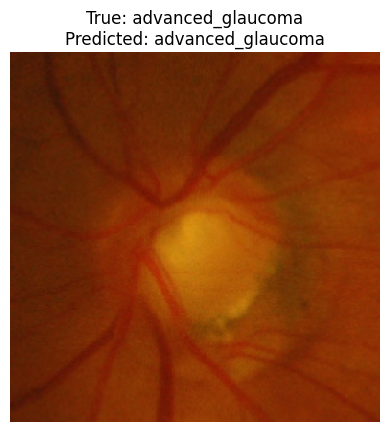

In [15]:
mobilemodel = build_mobilenetv2()
train_model(mobilemodel,"Custome MobileNetV2")